In [71]:
import pandas as pd
import seaborn as sns
import numpy as np
import dateutil.parser
from dateutil.tz import gettz
from dateutil import tz
from datetime import datetime
import time
import matplotlib

In [51]:
youtube_data = pd.read_csv('youtube_features.csv')

In [52]:
youtube_data.head()

,artist,video,time,viewCount,likeCount,dislikeCount,favoriteCount,commentCount,viewChannel,subscriberChannel
0,21 Savage,21 Savage - A Lot (Official Audio),2018-12-21T05:50:39.000Z,44797321,470630,17408,0,22894,1505671577,6007813
1,21 Savage,21 Savage - Break Da Law (Official Audio),2018-12-21T01:58:31.000Z,4748384,60817,1333,0,1473,1505671577,6007813
2,21 Savage,21 Savage - A&T (Official Audio),2018-12-21T01:58:31.000Z,3252885,43697,1478,0,1643,1505671577,6007813
3,21 Savage,21 Savage - Out For The Night (Official Audio),2018-12-21T01:58:31.000Z,2656637,42803,635,0,1417,1505671577,6007813
4,21 Savage,21 Savage - Gun Smoke (Official Audio),2018-12-21T01:58:31.000Z,5712582,66269,1269,0,2300,1505671577,6007813


In [53]:
youtube_data['favoriteCount'].unique()

array([0], dtype=int64)

In [54]:
youtube_data['like_view']=youtube_data['likeCount']/youtube_data['viewCount']
youtube_data['comment_view']=youtube_data['commentCount']/youtube_data['viewCount']

[(0, 0.02)]

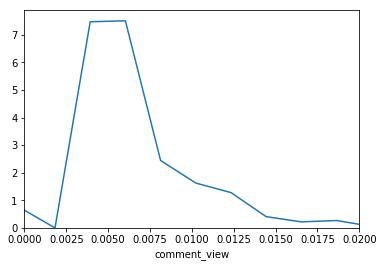

In [55]:
lm = sns.distplot(youtube_data['comment_view'].replace([np.inf, -np.inf], np.nan).dropna(),hist = False)
lm.set(xlim=(0, 0.02))

[(0, 0.5)]

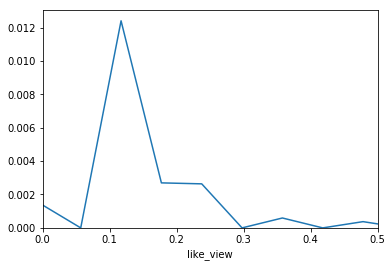

In [56]:
lm = sns.distplot(youtube_data['like_view'].replace([np.inf, -np.inf], np.nan).dropna(),hist = False)
lm.set(xlim=(0, 0.5))

In [57]:
def convertTZ(d):
    from_zone = tz.gettz('UTC')
    d = d.replace(tzinfo=from_zone)
    to_zone = tz.gettz('America/Pittsburgh')
    return d.astimezone(to_zone)

def datetime_from_utc_to_local(utc_datetime):
    now_timestamp = time.time()
    offset = datetime.fromtimestamp(now_timestamp) - datetime.utcfromtimestamp(now_timestamp)
    return utc_datetime + offset

In [58]:
youtube_data["time"] =  youtube_data["time"].apply(dateutil.parser.parse)
youtube_data["time"] =  youtube_data["time"].apply(convertTZ)
youtube_data["time"] =  youtube_data["time"].apply(datetime_from_utc_to_local)

youtube_data["time"].head()

0   2018-12-21 01:50:39
1   2018-12-20 21:58:31
2   2018-12-20 21:58:31
3   2018-12-20 21:58:31
4   2018-12-20 21:58:31
Name: time, dtype: datetime64[ns]

In [59]:
def get_hour(d):
    return d.hour
youtube_data["hour"] = youtube_data["time"].apply(get_hour)
youtube_data.head()

,artist,video,time,viewCount,likeCount,dislikeCount,favoriteCount,commentCount,viewChannel,subscriberChannel,like_view,comment_view,hour
0,21 Savage,21 Savage - A Lot (Official Audio),2018-12-21 01:50:39,44797321,470630,17408,0,22894,1505671577,6007813,0.010506,0.000511,1
1,21 Savage,21 Savage - Break Da Law (Official Audio),2018-12-20 21:58:31,4748384,60817,1333,0,1473,1505671577,6007813,0.012808,0.000310,21
2,21 Savage,21 Savage - A&T (Official Audio),2018-12-20 21:58:31,3252885,43697,1478,0,1643,1505671577,6007813,0.013433,0.000505,21
3,21 Savage,21 Savage - Out For The Night (Official Audio),2018-12-20 21:58:31,2656637,42803,635,0,1417,1505671577,6007813,0.016112,0.000533,21
4,21 Savage,21 Savage - Gun Smoke (Official Audio),2018-12-20 21:58:31,5712582,66269,1269,0,2300,1505671577,6007813,0.011601,0.000403,21


[(0, 24)]

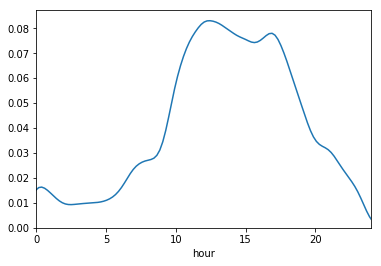

In [60]:
lm = sns.distplot(youtube_data['hour'].replace([np.inf, -np.inf], np.nan).dropna(),hist = False)
lm.set(xlim=(0, 24))

This is interesting, it seems most videos are published during working hours.

In [61]:
youtube_data["engage"] = (youtube_data["viewCount"] + youtube_data["likeCount"] +youtube_data["dislikeCount"] +youtube_data["commentCount"])/youtube_data["subscriberChannel"]

[(0, 500000)]

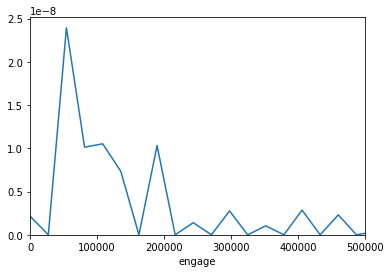

In [63]:
lm = sns.distplot(youtube_data['engage'].replace([np.inf, -np.inf], np.nan).dropna(),hist = False)
lm.set(xlim=(0, 500000))

In [69]:
youtube_data["engage"].describe()

count    2.014900e+04
mean     7.886985e+02
std      2.973599e+04
min      0.000000e+00
25%      1.307974e-02
50%      1.122679e-01
75%      2.014506e+00
max      3.437224e+06
Name: engage, dtype: float64

In [154]:
def hour_rounder(t):
    # Rounds to nearest hour by adding a timedelta hour if minute >= 30
    return (t.replace(second=0, microsecond=0, minute=0, hour=0,day=1))

In [155]:
date_count = youtube_data['time'].apply(hour_rounder)

In [156]:
date_count = date_count.groupby(date_count).count().to_frame()
# date_count.columns = ['time','number']
date_count.columns = ['time']
t = date_count['time'].index
ycount = date_count['time'].values
ytime = t.values
# ytime

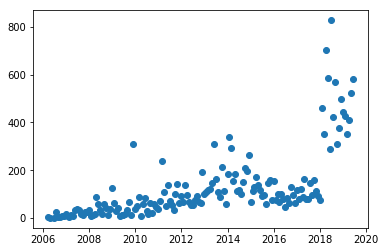

In [157]:

# date_count =  youtube_data['time'].groupby(df['time'])
ytime = matplotlib.dates.date2num(ytime)
matplotlib.pyplot.plot_date(ytime,ycount)

Number of videos published every month
Note 2018 - 2019

In [158]:
youtube_data.to_csv('youtube_data.csv')